In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from pgmpy.models import BayesianModel
from pgmpy.estimators import MaximumLikelihoodEstimator
import seaborn as sns

In [2]:
df=pd.read_csv('heart.csv')
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
292,40,1,3,152,223,0,0,181,0,0.0,0,0,2,1
293,39,1,3,118,219,0,0,140,0,1.2,1,0,2,1
294,35,1,3,120,198,0,0,130,1,1.6,1,0,2,1
295,35,0,3,138,183,0,0,182,0,1.4,0,0,0,0
296,35,1,3,126,282,0,2,156,1,0.0,0,0,2,1


In [3]:
bins=[28, 45, 64, 79]
names=[0, 1, 2]
df['ageC']=pd.cut(df['age'], bins, labels=names)

In [4]:
df.age

0      69
1      69
2      66
3      65
4      64
       ..
292    40
293    39
294    35
295    35
296    35
Name: age, Length: 297, dtype: int64

In [5]:
bins=[90, 120, 140, 201]
names=[0, 1, 2]
df['trestbpsC']=pd.cut(df['trestbps'], bins, labels=names)
df=df.drop(['trestbps'], axis=1)
df.head()

,age,sex,cp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition,ageC,trestbpsC
0,69,1,0,234,1,2,131,0,0.1,1,1,0,0,2,2
1,69,0,0,239,0,0,151,0,1.8,0,2,0,0,2,1
2,66,0,0,226,0,0,114,0,2.6,2,0,0,0,2,2
3,65,1,0,282,1,2,174,0,1.4,1,1,0,1,2,1
4,64,1,0,211,0,2,144,1,1.8,1,0,0,0,1,0


In [6]:
bins=[125, 200, 240, 565]
names=[0, 1, 2]
df['cholC']=pd.cut(df['chol'], bins, labels=names)
df=df.drop(['chol'], axis=1)
df.head()

,age,sex,cp,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition,ageC,trestbpsC,cholC
0,69,1,0,1,2,131,0,0.1,1,1,0,0,2,2,1
1,69,0,0,0,0,151,0,1.8,0,2,0,0,2,1,1
2,66,0,0,0,0,114,0,2.6,2,0,0,0,2,2,1
3,65,1,0,1,2,174,0,1.4,1,1,0,1,2,1,2
4,64,1,0,0,2,144,1,1.8,1,0,0,0,1,0,1


In [7]:
df['age220'] = 220 - df['age']

In [8]:
df['thalachC'] = df['age220'] < df['thalach']

In [9]:
df['thalach'].replace([True, False], [1, 0], inplace=True)

In [10]:
df=df.drop(['thalach'], axis=1)
df=df.drop(['age'], axis=1)
df.head()

,sex,cp,fbs,restecg,exang,oldpeak,slope,ca,thal,condition,ageC,trestbpsC,cholC,age220,thalachC
0,1,0,1,2,0,0.1,1,1,0,0,2,2,1,151,False
1,0,0,0,0,0,1.8,0,2,0,0,2,1,1,151,False
2,0,0,0,0,0,2.6,2,0,0,0,2,2,1,154,False
3,1,0,1,2,0,1.4,1,1,0,1,2,1,2,155,True
4,1,0,0,2,1,1.8,1,0,0,0,1,0,1,156,False


In [11]:
bins=[-1, 2, 6.3]
names=[0, 1]
df['oldpeakC']=pd.cut(df['oldpeak'], bins, labels=names)
df=df.drop(['oldpeak'], axis=1)
df.head()

,sex,cp,fbs,restecg,exang,slope,ca,thal,condition,ageC,trestbpsC,cholC,age220,thalachC,oldpeakC
0,1,0,1,2,0,1,1,0,0,2,2,1,151,False,0
1,0,0,0,0,0,0,2,0,0,2,1,1,151,False,0
2,0,0,0,0,0,2,0,0,0,2,2,1,154,False,1
3,1,0,1,2,0,1,1,0,1,2,1,2,155,True,0
4,1,0,0,2,1,1,0,0,0,1,0,1,156,False,0


In [12]:
df.oldpeakC

0      0
1      0
2      1
3      0
4      0
      ..
292    0
293    0
294    0
295    0
296    0
Name: oldpeakC, Length: 297, dtype: category
Categories (2, int64): [0 < 1]

In [42]:
age=df.ageC
young=0
middle=0
adult=0

In [44]:
for i in range(297):
    if age[i]==0:
        young+=1
    if age[i]==1:
        middle+=1    
    else:
        adult+=1

In [45]:
adult

102

([<matplotlib.patches.Wedge at 0x2a00dd4c0a0>,
 [Text(0.9461275796854134, 0.5611083700664443, '29-45'),
  Text(-1.0295673773932654, 0.387286735388076, '46-64'),
  Text(0.6879930056833714, -0.8582922719742737, '64-77')],
 [Text(0.5160695889193163, 0.3060591109453332, '17.0%'),
  Text(-0.5615822058508719, 0.2112473102116778, '54.5%'),
  Text(0.3752689121909298, -0.4681594210768765, '28.5%')])

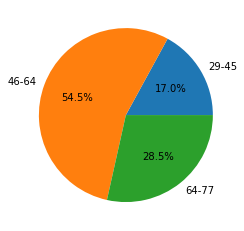

In [46]:
fig, ax = plt.subplots()
ax.pie([young,middle,adult], labels=['29-45','46-64','64-77'], autopct='%1.1f%%')

In [93]:
thal=df.thal
n0=0
n1=0
n2=0

In [94]:
for i in range(297):
    if thal[i]==0:
        n0+=1
    if thal[i]==1:
        n1+=1    
    else:
        n2+=1

In [95]:
n1

18

([<matplotlib.patches.Wedge at 0x2a00f219550>,
 [Text(0.481609242391929, 0.9889653874846542, '0'),
  Text(-0.7791415449536511, 0.7764911158070245, '1'),
  Text(-0.3569827525977449, -1.0404630288230994, '2')],
 [Text(0.26269595039559757, 0.5394356659007205, '35.6%'),
  Text(-0.42498629724744597, 0.4235406086220133, '3.9%'),
  Text(-0.1947178650533154, -0.5675252884489632, '60.5%')])

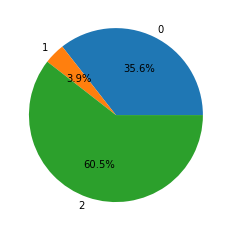

In [96]:
fig, ax = plt.subplots()
ax.pie([n0,n1,n2], labels=['0','1','2'], autopct='%1.1f%%')

In [59]:
gender=df.sex
female=0
male=0

In [60]:
for i in range(297):
    if gender[i]==0:
        female+=1
    else:
        male+=1

In [61]:
female

96

([<matplotlib.patches.Wedge at 0x29215ff98b0>,
 [Text(-0.5799479277427769, 0.9346980266946426, 'male'),
  Text(0.5799478402300292, -0.9346980809932823, 'female')],
 [Text(-0.31633523331424196, 0.5098352872879868, '67.7%'),
  Text(0.3163351855800159, -0.5098353169054266, '32.3%')])

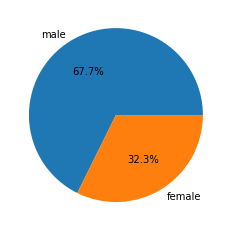

In [62]:
fig, ax = plt.subplots()
ax.pie([male,female], labels=['male','female'], autopct='%1.1f%%')

In [63]:
fbs=df.fbs
true=0
false=0

In [64]:
for i in range(297):
    if fbs[i]==0:
        false+=1
    else:
        true+=1

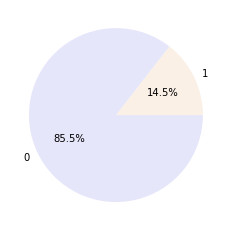

In [65]:
fig, ax = plt.subplots()
ax.pie([true,false], labels=['1','0'], autopct='%1.1f%%',
      colors=[ 'linen', 'lavender'])
plt.show()

In [47]:
count10=0
count11=0
count12=0
count00=0
count01=0
count02=0
prob0=0
prob1=0
target=df.condition
slope=df.slope

In [108]:
for i in range(297):
    if target[i]==1 and slope[i]==0:
        count10+=1
    if target[i]==1 and slope[i]==1:
        count11+=1        
    if target[i]==1 and slope[i]==2:
        count12+=1    
    if target[i]==1:
        prob0+=1


In [109]:
for i in range(297):
    if target[i]==0 and slope[i]==0:
        count00+=1
    if target[i]==0 and slope[i]==1:
        count01+=1        
    if target[i]==0 and slope[i]==2:
        count02+=1    
    if target[i]==0:
        prob1+=1

In [113]:
arr1=[count00/prob1, count01/prob1, count02/prob1]
arr2=[count10/prob0, count11/prob0, count12/prob0]

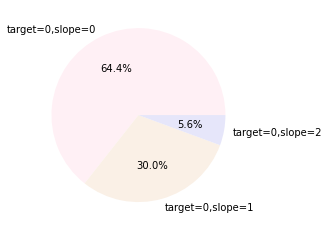

In [116]:
fig, ax = plt.subplots()
ax.pie(arr1, labels=['target=0,slope=0','target=0,slope=1','target=0,slope=2'], autopct='%1.1f%%',
      colors=['lavenderblush', 'linen', 'lavender'])
plt.show()

<ipython-input-117-e5162282ce3e>:2: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  ax.pie(arr2, labels=['target=1,slope=0','target=1,slope=1','target=1,slope=2'], autopct='%1.1f%%',


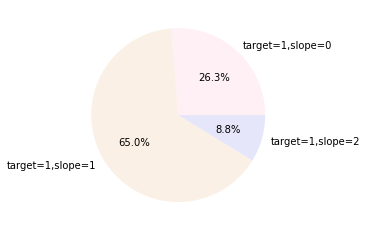

In [117]:
fig, ax = plt.subplots()
ax.pie(arr2, labels=['target=1,slope=0','target=1,slope=1','target=1,slope=2'], autopct='%1.1f%%',
      colors=['lavenderblush', 'linen', 'lavender'])
plt.show()

In [54]:
count10=0
count11=0
count20=0
count00=0
count01=0
count21=0
prob0=0
prob1=0
prob2=0
age=df.ageC
fbs=df.fbs

In [55]:
for i in range(297):
    if age[i]==0 and fbs[i]==0:
        count00+=1
    if age[i]==0 and fbs[i]==1:
        count01+=1        
    if age[i]==0:
        prob0+=1

In [56]:
for i in range(297):
    if age[i]==1 and fbs[i]==0:
        count10+=1
    if age[i]==1 and fbs[i]==1:
        count11+=1        
    if age[i]==1:
        prob1+=1

In [57]:
for i in range(297):
    if age[i]==2 and fbs[i]==0:
        count20+=1
    if age[i]==2 and fbs[i]==1:
        count21+=1        
    if age[i]==2:
        prob2+=1

In [58]:
arr1=[count00/prob0, count01/prob0]
arr2=[count10/prob1, count11/prob1]
arr3=[count20/prob2, count21/prob2]

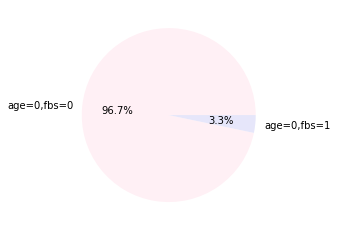

In [59]:
fig, ax = plt.subplots()
ax.pie(arr1, labels=['age=0,fbs=0','age=0,fbs=1'], autopct='%1.1f%%',
      colors=['lavenderblush', 'lavender'])
plt.show()

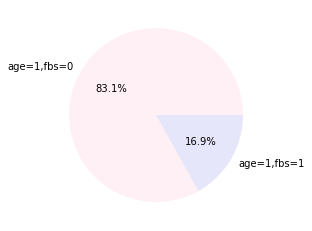

In [60]:
fig, ax = plt.subplots()
ax.pie(arr2, labels=['age=1,fbs=0','age=1,fbs=1'], autopct='%1.1f%%',
      colors=['lavenderblush', 'lavender'])
plt.show()

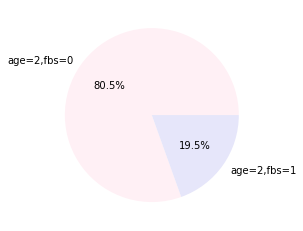

In [61]:
fig, ax = plt.subplots()
ax.pie(arr3, labels=['age=2,fbs=0','age=2,fbs=1'], autopct='%1.1f%%',
      colors=['lavenderblush', 'lavender'])
plt.show()

In [62]:
count10=0
count11=0
count00=0
count01=0
prob0=0
prob1=0
target=df.condition
fbs=df.fbs

In [63]:
for i in range(297):
    if fbs[i]==0 and target[i]==0:
        count00+=1
    if fbs[i]==0 and target[i]==1:
        count01+=1        
    if fbs[i]==0:
        prob0+=1

In [64]:
for i in range(297):
    if fbs[i]==1 and target[i]==0:
        count10+=1
    if fbs[i]==1 and target[i]==1:
        count11+=1        
    if fbs[i]==1:
        prob1+=1

In [65]:
arr1=[count00/prob0, count01/prob0]
arr2=[count10/prob1, count11/prob1]

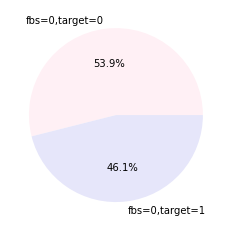

In [66]:
fig, ax = plt.subplots()
ax.pie(arr1, labels=['fbs=0,target=0','fbs=0,target=1'], autopct='%1.1f%%',
      colors=['lavenderblush', 'lavender'])
plt.show()

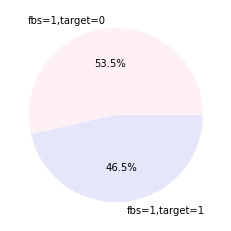

In [67]:
fig, ax = plt.subplots()
ax.pie(arr2, labels=['fbs=1,target=0','fbs=1,target=1'], autopct='%1.1f%%',
      colors=['lavenderblush', 'lavender'])
plt.show()

In [70]:
count10=0
count11=0
count00=0
count01=0
count20=0
count21=0
prob2=0
prob0=0
prob1=0
target=df.condition
trestbps=df.trestbpsC

In [71]:
for i in range(297):
    if trestbps[i]==0 and target[i]==0:
        count00+=1
    if trestbps[i]==0 and target[i]==1:
        count01+=1        
    if trestbps[i]==0:
        prob0+=1

In [72]:
for i in range(297):
    if trestbps[i]==1 and target[i]==0:
        count10+=1
    if trestbps[i]==1 and target[i]==1:
        count11+=1        
    if trestbps[i]==1:
        prob1+=1

In [73]:
for i in range(297):
    if trestbps[i]==2 and target[i]==0:
        count20+=1
    if trestbps[i]==2 and target[i]==1:
        count21+=1        
    if trestbps[i]==2:
        prob2+=1

In [74]:
arr1=[count00/prob0, count01/prob0]
arr2=[count10/prob1, count11/prob1]
arr2=[count20/prob2, count21/prob2]

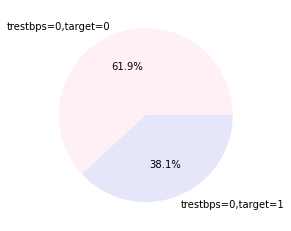

In [75]:
fig, ax = plt.subplots()
ax.pie(arr1, labels=['trestbps=0,target=0','trestbps=0,target=1'], autopct='%1.1f%%',
      colors=['lavenderblush', 'lavender'])
plt.show()

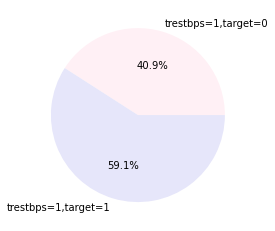

In [76]:
fig, ax = plt.subplots()
ax.pie(arr2, labels=['trestbps=1,target=0','trestbps=1,target=1'], autopct='%1.1f%%',
      colors=['lavenderblush', 'lavender'])
plt.show()

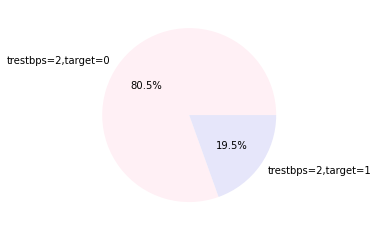

In [77]:
fig, ax = plt.subplots()
ax.pie(arr3, labels=['trestbps=2,target=0','trestbps=2,target=1'], autopct='%1.1f%%',
      colors=['lavenderblush', 'lavender'])
plt.show()

In [78]:
count10=0
count11=0
count00=0
count01=0
prob0=0
prob1=0
target=df.condition
gender=df.sex

In [79]:
for i in range(297):
    if gender[i]==0 and target[i]==0:
        count00+=1
    if gender[i]==0 and target[i]==1:
        count01+=1        
    if gender[i]==0:
        prob0+=1

In [80]:
for i in range(297):
    if gender[i]==1 and target[i]==0:
        count10+=1
    if gender[i]==1 and target[i]==1:
        count11+=1        
    if gender[i]==1:
        prob1+=1

In [81]:
arr1=[count00/prob0, count01/prob0]
arr2=[count10/prob1, count11/prob1]

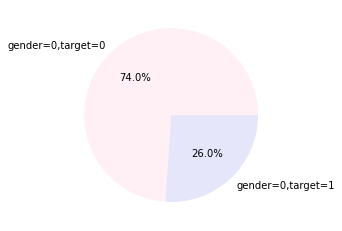

In [82]:
fig, ax = plt.subplots()
ax.pie(arr1, labels=['gender=0,target=0','gender=0,target=1'], autopct='%1.1f%%',
      colors=['lavenderblush', 'lavender'])
plt.show()

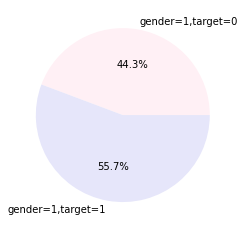

In [83]:
fig, ax = plt.subplots()
ax.pie(arr2, labels=['gender=1,target=0','gender=1,target=1'], autopct='%1.1f%%',
      colors=['lavenderblush', 'lavender'])
plt.show()

In [85]:
count10=0
count11=0
count00=0
count01=0
count20=0
count21=0
prob2=0
prob0=0
prob1=0
slope=df.slope
thalach=df.thalachC

In [86]:
for i in range(297):
    if slope[i]==0 and thalach[i]==0:
        count00+=1
    if slope[i]==0 and thalach[i]==1:
        count01+=1        
    if slope[i]==0:
        prob0+=1

In [87]:
for i in range(297):
    if slope[i]==1 and thalach[i]==0:
        count10+=1
    if slope[i]==1 and thalach[i]==1:
        count11+=1        
    if slope[i]==1:
        prob1+=1

In [88]:
for i in range(297):
    if slope[i]==2 and thalach[i]==0:
        count20+=1
    if slope[i]==2 and thalach[i]==1:
        count21+=1        
    if slope[i]==2:
        prob2+=1

In [89]:
arr1=[count00/prob0, count01/prob0]
arr2=[count10/prob1, count11/prob1]
arr2=[count20/prob2, count21/prob2]

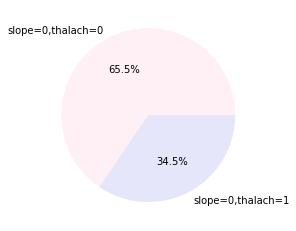

In [90]:
fig, ax = plt.subplots()
ax.pie(arr1, labels=['slope=0,thalach=0','slope=0,thalach=1'], autopct='%1.1f%%',
      colors=['lavenderblush', 'lavender'])
plt.show()

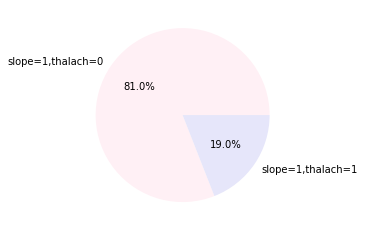

In [91]:
fig, ax = plt.subplots()
ax.pie(arr2, labels=['slope=1,thalach=0','slope=1,thalach=1'], autopct='%1.1f%%',
      colors=['lavenderblush', 'lavender'])
plt.show()

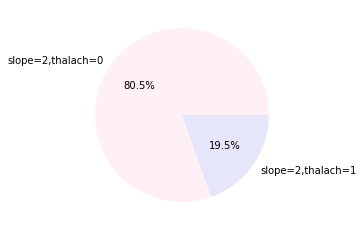

In [92]:
fig, ax = plt.subplots()
ax.pie(arr3, labels=['slope=2,thalach=0','slope=2,thalach=1'], autopct='%1.1f%%',
      colors=['lavenderblush', 'lavender'])
plt.show()

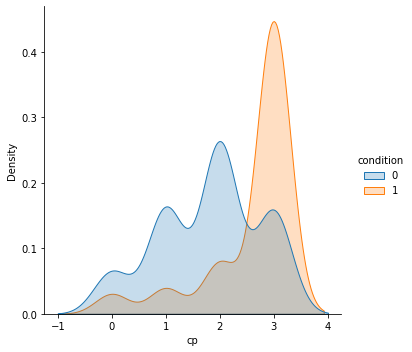

In [7]:
sns.displot(x='cp', data = df, kind = 'kde', hue = 'condition', fill = True)

In [24]:
heart_model = BayesianModel([('condition', 'cp'),('slope', 'oldpeakC'), ('condition', 'oldpeakC'),
                            ('slope', 'thalachC'), ('ageC', 'trestbpsC'), ('condition', 'slope'), ('sex', 'condition'),
                            ('thal', 'condition'), ('ageC', 'fbs'),('fbs', 'condition'), ('trestbpsC', 'condition')])

C:\Code\New folder\lib\site-packages\pgmpy\models\BayesianModel.py:8: FutureWarning: BayesianModel has been renamed to BayesianNetwork. Please use BayesianNetwork class, BayesianModel will be removed in future.
  warnings.warn(


In [25]:
df1=df.drop(['restecg',  'age220'], axis=1)

In [26]:
x=df1.drop(['condition', 'exang', 'ca', 'cholC'], axis = 1)
x.head()

,sex,cp,fbs,slope,thal,ageC,trestbpsC,thalachC,oldpeakC
0,1,0,1,1,0,2,2,False,0
1,0,0,0,0,0,2,1,False,0
2,0,0,0,2,0,2,2,False,1
3,1,0,1,1,0,2,1,True,0
4,1,0,0,1,0,1,0,False,0


In [27]:
y=df1['condition']
y.head()

0    0
1    0
2    0
3    1
4    0
Name: condition, dtype: int64

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [29]:
data_train=pd.concat([x_train, y_train], axis=1)
data_train.head()

,sex,cp,fbs,slope,thal,ageC,trestbpsC,thalachC,oldpeakC,condition
282,1,3,0,1,2,0,0,False,1,1
81,0,2,0,0,0,2,2,True,0,0
108,1,2,0,1,2,1,0,False,0,0
146,1,2,0,0,0,0,1,False,0,0
217,1,3,0,1,2,1,2,False,0,1


In [30]:
heart_model.fit(data_train, estimator=MaximumLikelihoodEstimator)

In [31]:
target_predict_values=heart_model.predict(x_test)

In [32]:
target_predict_values_array = target_predict_values.condition.values

In [33]:
target_predict_values_array

array([0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1], dtype=int64)

In [34]:
y_test_array=y_test.values
y_test_array

array([0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1], dtype=int64)

In [35]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

In [36]:
confusion_matrix(y_test_array, target_predict_values_array)

array([[19,  3],
       [ 7, 31]], dtype=int64)

In [37]:
from sklearn import metrics

In [38]:
from sklearn.metrics import classification_report

In [39]:
metrics.accuracy_score(y_test_array, target_predict_values_array)

0.8333333333333334

In [40]:
print(classification_report(y_test_array, target_predict_values_array))

              precision    recall  f1-score   support

           0       0.73      0.86      0.79        22
           1       0.91      0.82      0.86        38

    accuracy                           0.83        60
   macro avg       0.82      0.84      0.83        60
weighted avg       0.85      0.83      0.84        60



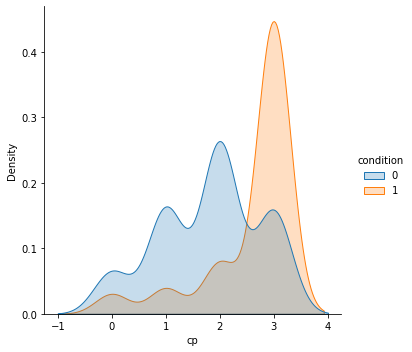

In [41]:
sns.displot(x='cp', data = df, kind = 'kde', hue = 'condition', fill = True)